# Objective: 
- Statistical Analysis of Business Data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.
- Explore the dataset and extract insights using Exploratory Data Analysis.
- Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? 
- Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
- Is the proportion of smokers significantly different across different regions? 
- Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.
- Consider a significance level of 0.05 for all tests.

# Data Dictionary:

- Age - This is an integer indicating the age of the primary beneficiary 
- Sex - This is the policy holder's gender, either male or female.
- BMI - This is the body mass index (BMI)
- Children - This is an integer indicating the number of children / dependents covered by the insurance plan.
- Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
- Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions 
- Charges - Individual medical costs billed to health insurance

### importing the necessary libraries

In [1]:
import os
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd # Current working directory

'/Users/sundeep/Learnings/1_PGP_DSBA/Project/3_Axis_Insurance'

In [3]:
os.chdir('/Users/sundeep/Learnings/1_PGP_DSBA/Project/3_Axis_Insurance/')

In [4]:
pwd

'/Users/sundeep/Learnings/1_PGP_DSBA/Project/3_Axis_Insurance'

### Read the data from CSV to DataFrame

In [5]:
# importing input CSV file.
df = pd.read_csv('AxisInsurance.csv')

In [6]:
# Copying data to another dataframe , Original data will not be changed and available in df dataframe
data = df.copy()

In [7]:
# Data types of all variables
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
# No of rows and columns
data.shape

(1338, 7)

<font color=darkblue>
    
### Observation
    
- In the data set we have 1338 rows and 7 columns.

### View the first few rows of the dataset

In [9]:
# Top 5 rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
# Last 5 rows
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [11]:
data.sample(10)

,age,sex,bmi,children,smoker,region,charges
935,59,female,27.500,0,no,southwest,12233.82800
1072,21,male,31.255,0,no,northwest,1909.52745
118,49,female,27.170,0,no,southeast,8601.32930
1227,42,male,37.180,2,no,southeast,7162.01220
856,48,female,33.110,0,yes,southeast,40974.16490
1228,56,male,34.430,0,no,southeast,10594.22570
626,36,male,28.880,3,no,northeast,6748.59120
1013,48,male,32.300,1,no,northwest,8765.24900
1096,51,female,34.960,2,yes,northeast,44641.19740
721,53,male,36.600,3,no,southwest,11264.54100


In [12]:
# Column data types and their count , The resulting object of value_counts will be in descending order
data.value_counts()
# data.value_counts(dropna = False)

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
30   male    37.430  3         no      northeast  5428.72770     1
             38.830  1         no      southeast  18963.17192    1
             44.220  2         no      southeast  4266.16580     1
31   female  21.755  0         no      northwest  4134.08245     1
                                                                ..
47   male    36.190  0         yes     southeast  41676.08110    1
             36.200  1         no      southwest  8068.18500     1
             38.940  2         yes     southeast  44202.65360    1
             47.520  1         no      southeast  8083.91980     1
18   female  20.790  0         no      southeast  1607.51010     1
Length: 1337, dtype: int64

In [13]:
# Check whether we have duplicate values or not
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

<font color=darkblue>
    
## Observation 

- In the given dataset we do not have any duplicate values

In [14]:
# Information about the columns of the input file
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<font color=darkblue>
    
## Observation 
    
- No null values in the dataset
    
## Fixing the data types
* Sex , Smoker and Region can be on Category Datatype

* coverting "objects" to "category" to reduce the data space required to store the dataframe`

In [15]:
# Changing the datatypes of variables.
data['sex'] = data.sex.astype('category')
data['smoker'] = data.smoker.astype('category')
data['region'] = data.region.astype('category')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


<font color=darkblue>
    
## Fixing the data types
* Memory usage became 9.4 KB from 73.3

In [17]:
data.describe() # details about the data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<font color=darkblue>
    
## Observation
    
- We have skewness in charges
- Standard deviation for children is 1.2 which means to say data is normalized and skewness
- Max age is 64 and Min is 18

In [18]:
data.isnull().sum() # To check the null values across each column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
data.describe(include=['category'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


<font color=darkblue>
    
## Observation 
- Male and Female was considerer along with 4 regions.

In [20]:
# Mean value of all numeric variables 
data.mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

<font color=darkblue>
    
## Observation 
- Average age is 39 with average charge of 13270


In [21]:
# Mode of all variables
data.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [22]:
# Median of all the values
data.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [23]:
# check for missing values - isna() or isnull()
# data.isna().sum()

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<font color=darkblue>

## Observation
- No null values in the dataset

In [24]:
#Values below 25% of the data lies
data.quantile(q=0.25)

age           27.00000
bmi           26.29625
children       0.00000
charges     4740.28715
Name: 0.25, dtype: float64

In [25]:
#Values below 50% of the data lies
data.quantile(q=0.50)

age           39.000
bmi           30.400
children       1.000
charges     9382.033
Name: 0.5, dtype: float64

In [26]:
#Values below 75% of the data lies
data.quantile(q=0.75)

age            51.000000
bmi            34.693750
children        2.000000
charges     16639.912515
Name: 0.75, dtype: float64

In [27]:
# IQR value for all numeric variables
data.quantile(0.75) - data.quantile(0.25)

age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64

# Exploratory Data Analysis

## Univariable Analysis - Continuous

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

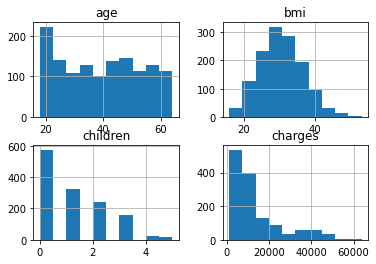

In [28]:
data.hist()

In [29]:
# Function for  Histogram and boxplot to analyze each and every variable

def hist_box(feature,figsize=(10,10),bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.20, .80)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True) # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, rug=True,ax=ax_hist2, bins=bins,color='g') if bins else sns.distplot(feature, kde=True,rug=True,ax=ax_hist2,color='r') # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

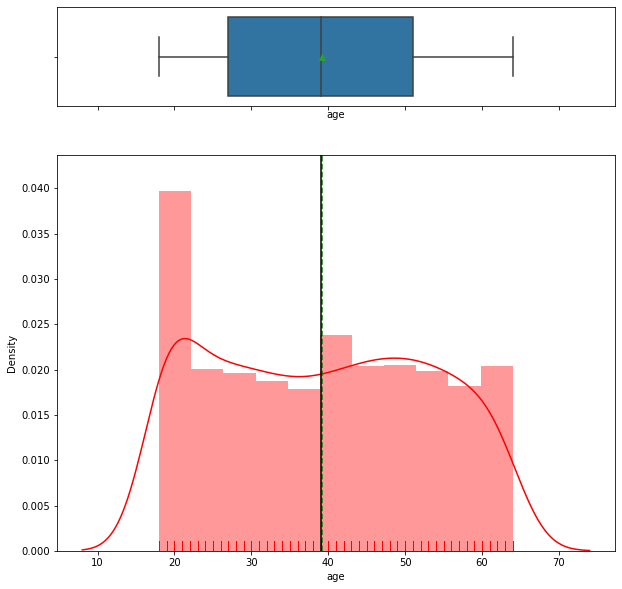

In [30]:
hist_box(data.age)

<font color = 'darkblue'>

## Observation
    
- Maximum age is 64 and minimum is 18.
- it looks like uniform distribution.
- Mean and Median are almost same
- We do not have outlayers in the data


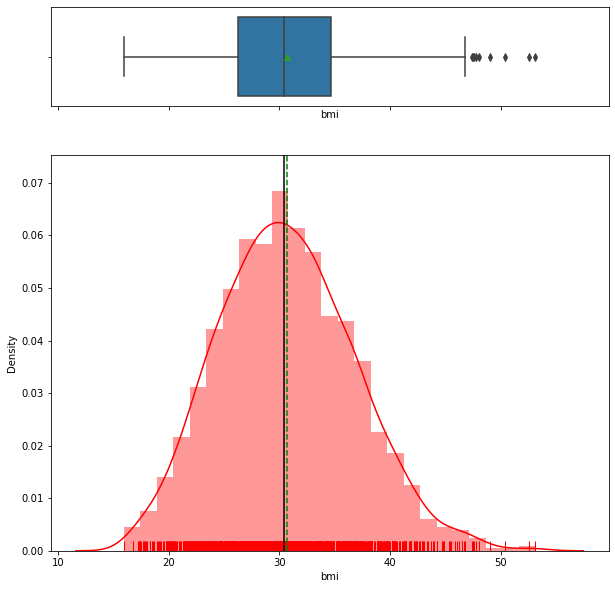

In [31]:
hist_box(data.bmi)

<font color = 'darkblue'>

## Observation
- Data is uniformly distributed
- Mean and Median is almost same
- No skewness in the data , but couple of outlayers we do have

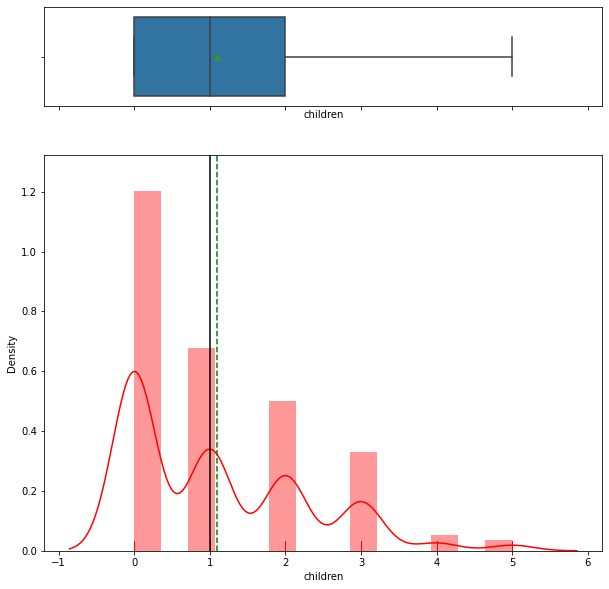

In [32]:
hist_box(data.children)

<font color = 'darkblue'>
    
## Observation
    
- Majority of the people does not have children
- Max number of children is 5

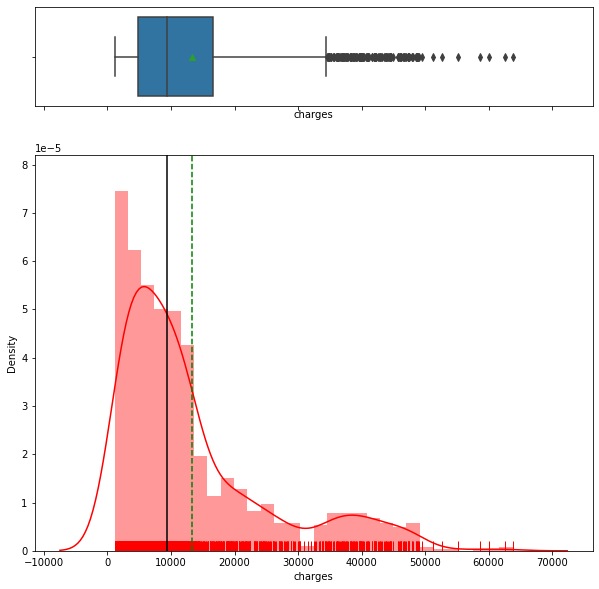

In [33]:
hist_box(data.charges)

<font color = 'darkblue'>
    
## Observation
    
- Data is not Normal distribution
- We could see lot of outlayers from the box plot

# Categorical variable analysis

In [34]:
# Function to return the percentage of categorical variable
def bar_perc(plot, feature):
    
    total = len(feature) 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y),size = 15)

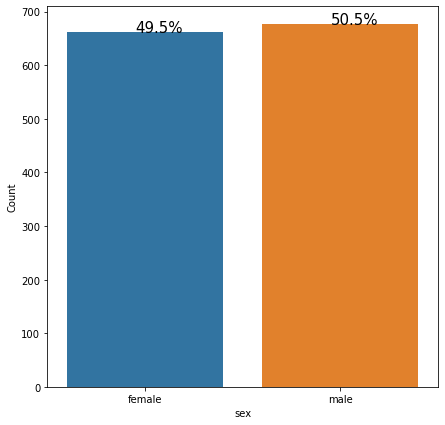

In [35]:
# Product count analysis 
plt.figure(figsize=(7,7))
ax = sns.countplot(data['sex'])
plt.xlabel('sex')
plt.ylabel('Count')
bar_perc(ax,data['sex'])
plt.show()

<font color = 'darkblue'>

## Observation
- Data elements are almost equally distributed across Male and Female

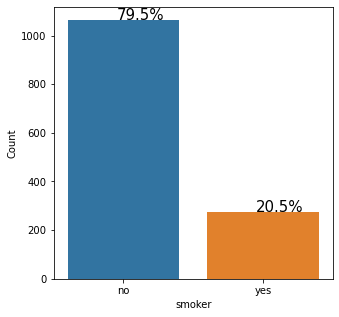

In [36]:
# Gender count analysis 
plt.figure(figsize=(5,5))
ax = sns.countplot(data['smoker'])
plt.xlabel('smoker')
plt.ylabel('Count')
bar_perc(ax,data['smoker'])

<font color = 'darkblue'>

## Observation
- People who smoke are less when compared to who do not smoke

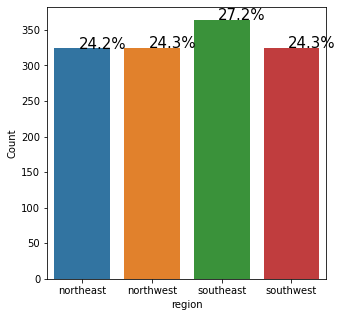

In [37]:
# Gender count analysis 
plt.figure(figsize=(5,5))
ax = sns.countplot(data['region'])
plt.xlabel('region')
plt.ylabel('Count')
bar_perc(ax,data['region'])

<font color=darkblue>
    
### Observation
    
- Southeast region has 27% which is highest , rest all the regions has almost same amount of data 24%

In [38]:
# Variance value
data.var()

age         1.974014e+02
bmi         3.718788e+01
children    1.453213e+00
charges     1.466524e+08
dtype: float64

In [39]:
# Standard deviation
data.std()

age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64

In [40]:
# Coveriance
data.cov()

,age,bmi,children,charges
age,197.401387,9.362337,0.719303,5.087480e+04
bmi,9.362337,37.187884,0.093795,1.464730e+04
children,0.719303,0.093795,1.453213,9.926742e+02
charges,50874.802298,14647.304426,992.674197,1.466524e+08


In [41]:
# Correlation
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


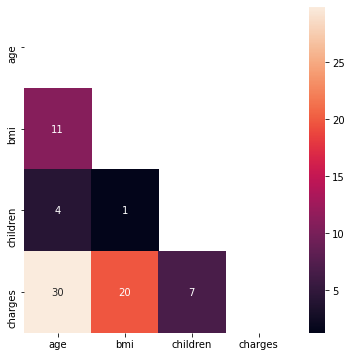

In [42]:
# Correlation plot for all numeric variables
plt.figure(figsize=(6,6))
corr = data.corr()
corr = corr * 100 # percentage conversion
mask = np.zeros_like(corr,dtype=np.bool) # To remove the other half which is duplicate
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,fmt='.0f', mask=mask);

<font color=darkblue>
    
## Observations

- As expected, Age and charges are correlated
- BMI and charges are next correlated
- No correlation between BMI and Children

In [43]:
data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

## Biviriate Analysis

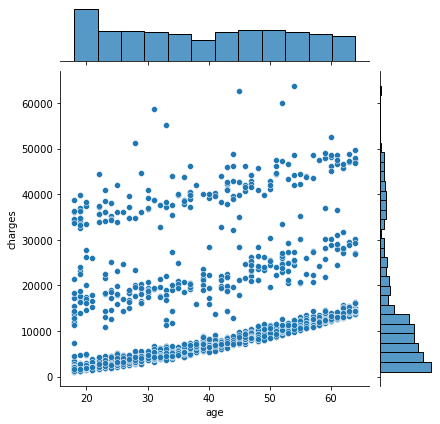

In [44]:
# Distrubution of data across Age and charges
sns.jointplot(data['age'],data['charges']);

<font color=darkblue>
    
## Observation
    
- Higher the age , more the charges are

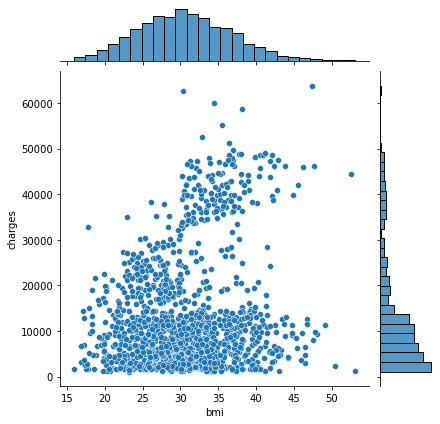

In [45]:
# bmi vs charges
sns.jointplot(x = 'bmi', y= 'charges',data=data);

<font color=darkblue>
    
## Observation 
    
- charges were filed by people across all BMI

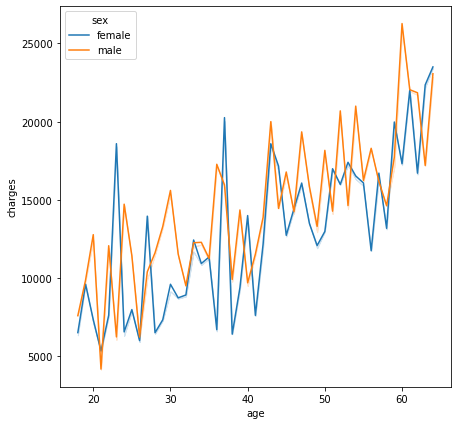

In [46]:
# age vs charges across sex
plt.figure(figsize=(7,7))
sns.lineplot(x= 'age', y = 'charges',hue='sex',data=data,ci=0);

<font color=darkblue>
    
## Observation 
    
- Both male and female filed charges , increased as the age is high.

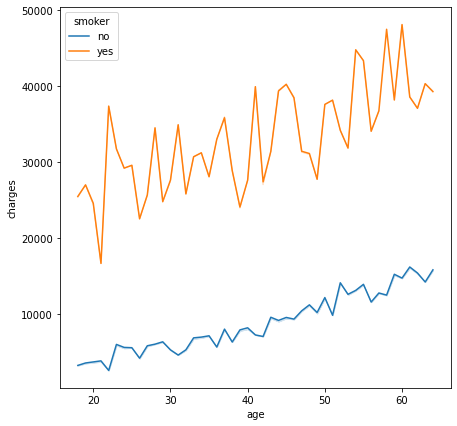

In [47]:
# age vs charges across sex
plt.figure(figsize=(7,7))
sns.lineplot(x= 'age', y = 'charges',hue='smoker',data=data,ci=0);

<font color=darkblue>
    
## Observation 
    
- More charges were filed by people who smoke when compared to who do not

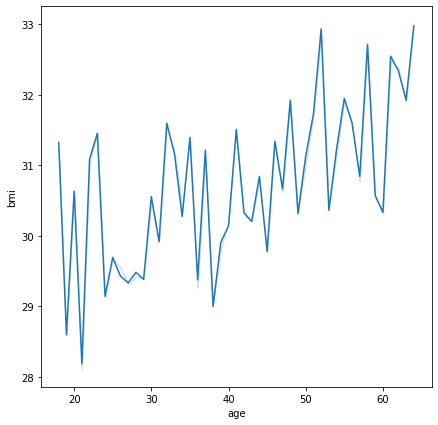

In [48]:
# age vs bmi across smoker and non smoker
plt.figure(figsize=(7,7))
sns.lineplot(x= 'age', y = 'bmi',data=data,  ci=0); # Lineplot with Hue

<font color=darkblue>
    
## Observation 
    
- More age , higher BMI

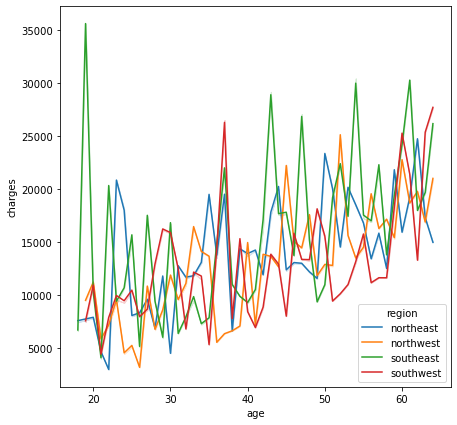

In [49]:
# age vs bmi across smoker and non smoker
plt.figure(figsize=(7,7))
sns.lineplot(x= 'age', y = 'charges',data=data, hue = 'region', ci=0); # Lineplot with Hue

<font color=darkblue>
    
## Observation 
    
- More charges were filed by people from southeast

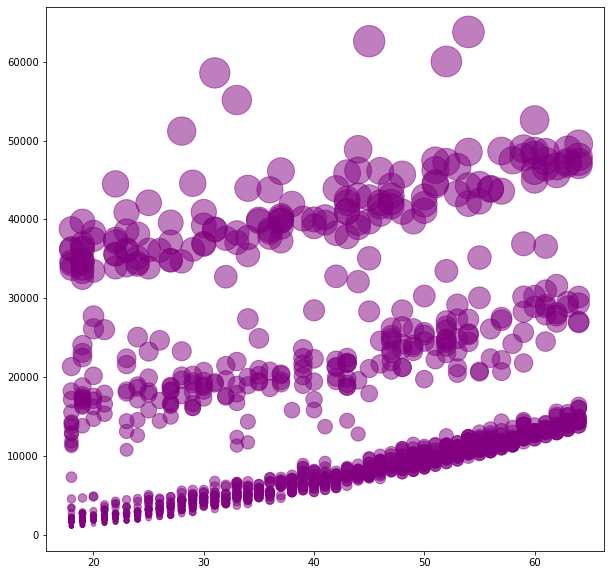

In [50]:
# Scattered plot for Charges and Age.
plt.figure(figsize=(10,10))
i_normal = (data.charges / data.charges.max()) * 1000 # Normalize the data
age=data.age
income=data.charges
plt.scatter(x = age, y = income, color='purple',s=i_normal,alpha=0.5)

<font color=darkblue>
    
## Observation 
    
- As expected, Age increases, charges also increases.

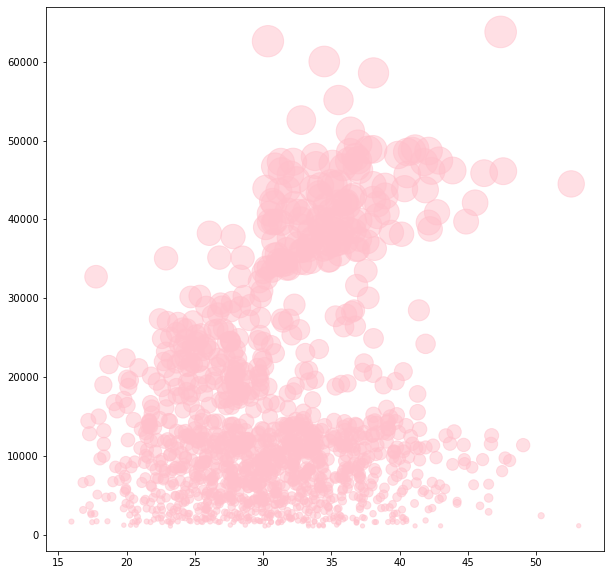

In [51]:
# Scattered plot for Income and Age.
plt.figure(figsize=(10,10))
i_normal = (data.charges / data.charges.max()) * 1000 # Normalize the data
bmi=data.bmi
income=data.charges
plt.scatter(x = bmi, y = income, color='pink',s=i_normal,alpha=0.5)

<font color=darkblue>
    
## Observation 
- Charges were filed by people across all ages

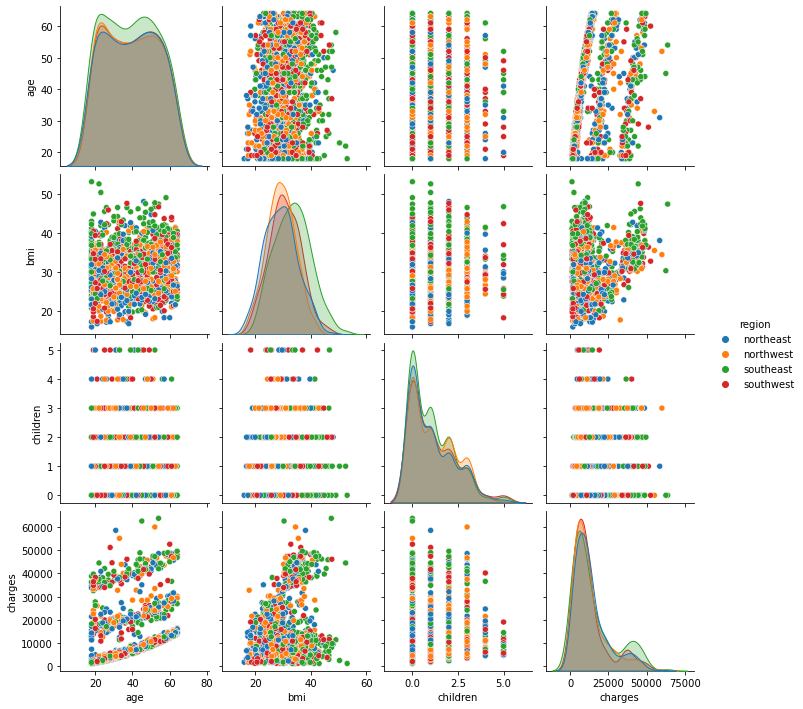

In [52]:
sns.pairplot(data=data,hue='region');

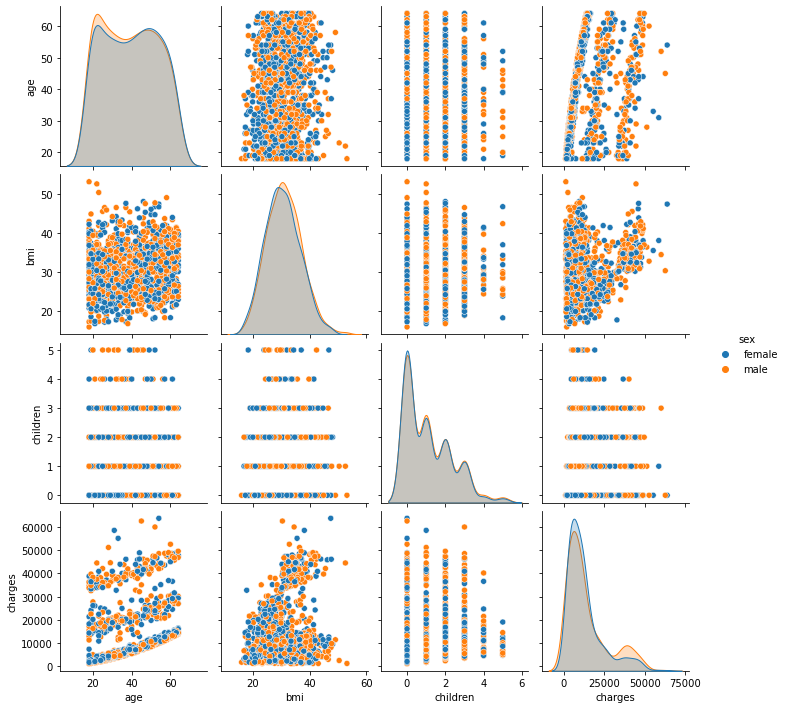

In [53]:
sns.pairplot(data=data,hue='sex');

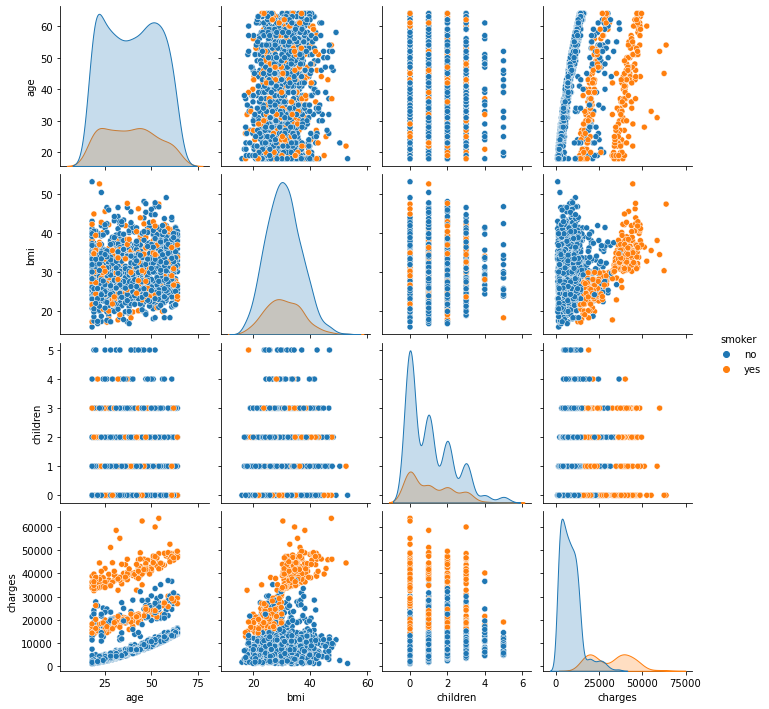

In [54]:
sns.pairplot(data=data,hue='smoker');

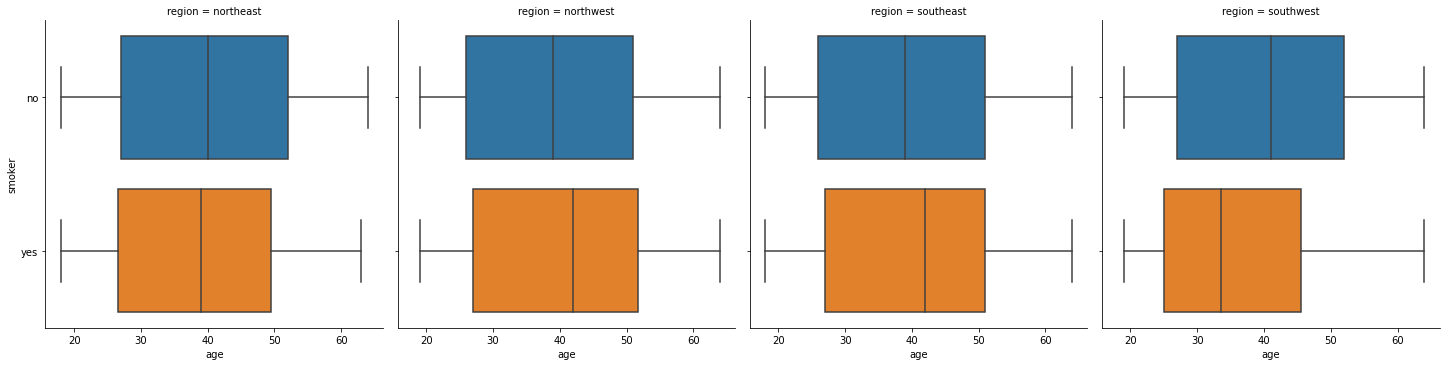

In [55]:
sns.catplot(x='age',
            y='smoker',
            col='region',
            data=data,
            kind='box');

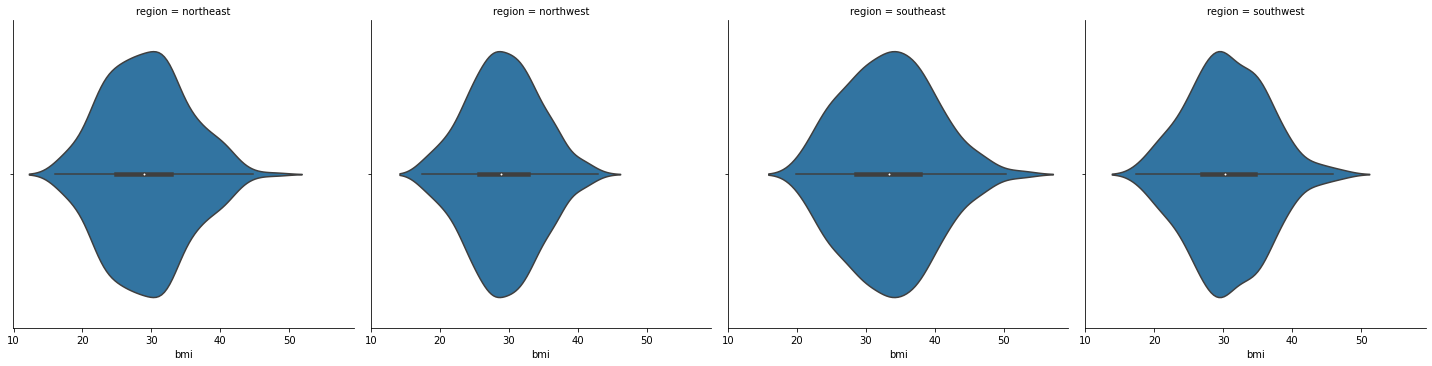

In [56]:
# Violin plot
sns.catplot(x='bmi',
             col='region', 
             data=data,
             col_wrap=4,
             kind="violin")

In [57]:
data.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [58]:
data.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [59]:
data.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

<font color=darkblue>
    
## Observation 

- Smoker has filed more charges
- More charges were filed by male 

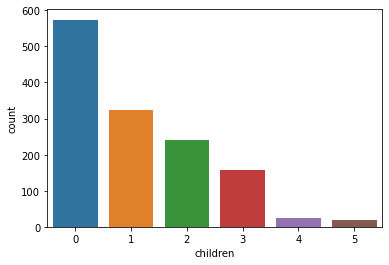

In [60]:
sns.countplot(data['children'])
plt.show()

<font color=darkblue>
    
## Observation 

- Majority of people does not have children

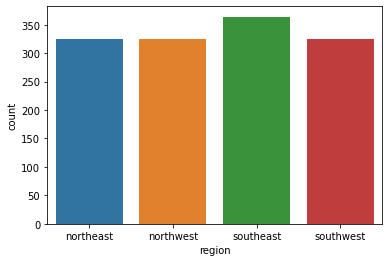

In [61]:
sns.countplot(data['region'])
plt.show()

<font color=darkblue>
    
## Observation 

- Data distribution is almost same across all the regions

# Conclusion

We analyzed a dataset of 1338 Insurance clients. In the dataset we have smoker and non smoker details of Male and Female. Data was spread across different regions , amount of claims submitted were also provided. 



- People who smoke are less when compared to who do not smoke
- As expected, Age and charges are highly correlated , BMI and charges are next correlated. We do not have any relation between BMI and Childern
- Both male and female at higher age has filed more charges
- More charges were filed by people who smoke when compared to who do not
- Male has filed more charges 
- Majority of people does not have children 
- We do have skewness in charges
- Standard deviation for children is 1.2 which means to say data is normalized and skewness
- Max age is 64 and Min is 18
- Average age is 39 with average charge of 13270
- Maximum age is 64 and minimum is 18 and it looks like a uniform distribution with out any outliers.
- Max number of children is 5

# Recommendations

- People who smoke should come down , such that charges filed will also become less. Average changes filed is around 13K that should come down.
- As the age increases smoking should be stopped.
- More changes were field by Male when compared to female , So their smoking habit should be controlled.

# Problem - 2

## Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? [Hint- Formulate a hypothesis and prove/disprove it]

## Step 1: Define null and alternate hypotheses

H0: Mean charges of smokers is less than or equal to non-smokers.

HA: Mean charges of smokers is greater than non-smokers.

## Step 2: Decide the significance level 
- Here we select α= 0.05 as per 95% Confidence Level for the test

## Step 3: Identify the test statistic 

- We can perform independent T-test , as the standard deviation is not known

## Step 4: Calculate the p - value of the test

In [62]:
#Null Hypothesis--> H0: Smokers does not make lot of claims
#Alternate hypothesis--> Ha: Smokers make lot of claims
import scipy.stats as stats

x1_smoker_yes = np.array(data[data['smoker'] == 'yes']['charges'])
x2_smoker_no  = np.array(data[data['smoker'] == 'no']['charges'])
#performing an independent T-test as the standard deviation is not known
t,pvalue = stats.ttest_ind(x1_smoker_yes,x2_smoker_no,axis =0) 
print(t, pvalue)

46.664921172723716 8.271435842177219e-283


In [63]:
if pvalue <0.05:
    print("Mean charges of smokers is less than or equal to non-smokers(reject H0)")
else:
    print("Mean charges of smokers is greater than non-smokers(Fail to Reject H0)")

Mean charges of smokers is less than or equal to non-smokers(reject H0)


<AxesSubplot:ylabel='Density'>

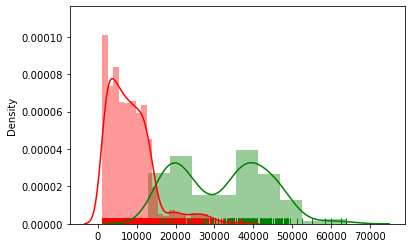

In [64]:
sns.distplot(x1_smoker_yes, kde=True, rug=True,color='g')
sns.distplot(x2_smoker_no, kde=True, rug=True,color='r')

# Conclusion
- People who some does make lot of charges , Hence REJECTING null hypothesis.

# Problem - 3

## Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

## Step 1: Define null and alternate hypotheses

H0: BMI of Females do not differ significantly from that of Males

HA: BMI of Females differs significantly from that of Males

## Step 2: Decide the significance level 
- Here we select α= 0.05 as per 95% Confidence Level for the test

## Step 3: Identify the test statistic 

- We can perform independent T-test , as the standard deviation is not known

## Step 4: Calculate the p - value of the test

In [65]:
# H0: BMI of Females do not differ significantly from that of Males
# HA: BMI of Females differs significantly from that of Males
bmi_male = np.array(data[data['sex'] == 'male']['bmi'])
bmi_female = np.array(data[data['sex'] == 'female']['bmi'])

#performing an independent T-test as the standard deviation is not known
t_value,p_value = stats.ttest_ind(bmi_male,bmi_female)
t_value,p_value

(1.696752635752224, 0.08997637178984932)

In [66]:
if p_value < 0.05:
    print("BMI of Females do not differ significantly from that of Males - Reject Null hypothesis")
else:
    print("BMI of Females differs significantly from that of Males - Fail to Reject Null hypothesis")

BMI of Females differs significantly from that of Males - Fail to Reject Null hypothesis


<AxesSubplot:ylabel='Density'>

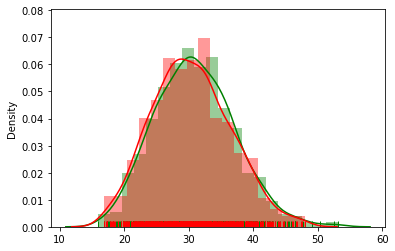

In [67]:
sns.distplot(bmi_male, kde=True, rug=True,color='g')
sns.distplot(bmi_female, kde=True, rug=True,color='r')

# Conclusion
- BMI of Females do not differ significantly from that of Males

## Problem 4

## Is the proportion of smokers significantly different across different regions? [Hint : Create a contingency table/cross tab, Use the function : stats.chi2_contingency()]

## Step 1: Define null and alternate hypotheses

- H0 = Proportion of smokers do not differs across different regions
- Ha = Proportion of smokers differs across different regions

## Step 2: Decide the significance level 
- Here we select α= 0.05 as per 95% Confidence Level for the test

## Step 3: Identify the test statistic 

- We need to perform chi2 test

## Step 4: Calculate the p - value of the test

In [68]:
from scipy.stats import chi2_contingency
cross_tab = pd.crosstab(data['smoker'],data['region'])
cross_tab

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [69]:
contigency_pct = pd.crosstab(df['smoker'], df['region'], normalize='index')
contigency_pct

region,northeast,northwest,southeast,southwest
smoker,,,,
no,0.241541,0.250940,0.256579,0.250940
yes,0.244526,0.211679,0.332117,0.211679


In [70]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(cross_tab) 
# Print the p-value
print(p)

0.06171954839170547


In [71]:
if p_value < 0.05:
    print("Proportion of smokers do not differs across different regions - Reject Null hypothesis")
else:
    print("Proportion of smokers differs across different regions - Fail to Reject Null hypothesis")

Proportion of smokers differs across different regions - Fail to Reject Null hypothesis


# Conclusion

- Proportion of smokers differs across different regions

# Problem 5 

## Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidenc

## Step 1: Define null and alternate hypotheses

##### - H0 = Mean BMI of women with no children, one child, and two children not same
##### - Ha = Mean BMI of women with no children, one child, and two children same

- H0 = Mean BMI of women with no children, one child, and two children same
- Ha = Atleast one BMI of women with no children, one child, and two children differ

## Step 2: Decide the significance level 
- Here we select α= 0.05 as per 95% Confidence Level for the test

## Step 3: Identify the test statistic 

- We need to perform ANOVA Test.

## Step 4: Calculate the p - value of the test

In [79]:
from scipy.stats import f_oneway

# female_df = df[df['sex'] == 'female'] , this step I missed in the project , after mentor learning session added this line

zero_children = np.array(female_df[female_df['children'] == 0]['bmi'])
one_children = np.array(female_df[female_df['children'] == 1]['bmi'])
two_children = np.array(female_df[female_df['children'] == 2]['bmi'])

In [80]:
F, p_value = stats.f_oneway(zero_children,one_children,two_children)
p_value

0.7158579926754841

<AxesSubplot:ylabel='Density'>

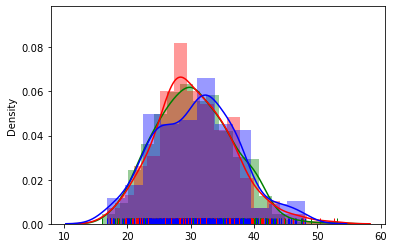

In [74]:
sns.distplot(zero_children, kde=True, rug=True,color='g')
sns.distplot(one_children, kde=True, rug=True,color='r')
sns.distplot(two_children, kde=True, rug=True,color='b')

In [75]:
if p_value < 0.05:
    print("Mean BMI of women with no children, one child, and two children not same - Reject Null hypothesis")
else:
    print("Mean BMI of women with no children, one child, and two children same - Fail to Reject Null hypothesis")

Mean BMI of women with no children, one child, and two children same - Fail to Reject Null hypothesis


# Conclusion

- Mean BMI of women with no children, one child, and two children same